<a href="https://colab.research.google.com/github/krumeto/COMS4995-s20/blob/master/aml_07_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

## Notes
Remember:
1. When scaling, fit only on the training set, then transform the training and test sets.
2. RidgeCV - like Ridge with cool hyperparameters. More robust for scaling.
3. KneighborsRegressor - really sensitive to processing.
4. Do Preprocessing within the cross validation loop. Remember to not do preprocessing (feature selection, scaling) with the test set in. Pipeline does that for us.
5. make_pipeline vs Pipeline
- make_pipeline gives names automatically (lowercase on the objects)
- Important to have Classifier/Regressor as last step
- Put some Classifier/Regressor in the last step and don't worry - GridSearchCV will override it
6. Do Pipeline, then GridSearchCV
- Gridsearch accepts dicts or lists of dicts
- Big Gridsearch = Big Risk of overfitting
- Perhaps do more Cross validation
7. Categorical variables
- in Pandas, df.["col"].astype("category").cat.codes. Usually not a great idea, because it enforces an ordering of variables
- Better - pd.get_dummies(df) - new column per category. Be careful - if you get new data!
Solution 1) provide categories explicitely if you know them
Solution 2) OneHotEncoder.fit(df) - be careful, it will encode the numerical as well.
Solution 3) make_column_transformer
categorical = df.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, LogisticRegression())
Remember - one-hot encoding - a bit of a trouble with collinearity (because sum of all columns = 1)
8. Models which support Discrete Features
- In principle, all tree-based + Naive Bayers
- in scikit-learn, Naive Bayes now
- soon - DTs, RFs, GB
9. Important - Target Encoding
- think prices and zip-codes, customers.
- Instead 100 zip code-based one-hot variables, one "response encoded" variable
- For regression - "average price in zip code"
- Binary Cl. - "building in this zip code have a likelihood p for class 1"
- Multiclass - One feature per class: probability distribution
categorical-encoding package -> TargetEncoder


**Author**: https://www.kaggle.com/harlfoxem/  
https://www.kaggle.com/harlfoxem/  
**Source**: [original](https://www.kaggle.com/harlfoxem/housesalesprediction) - 2016-08-25  
**Please cite**:   

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It contains 19 house features plus the price and the id columns, along with 21613 observations.
It's a great dataset for evaluating simple regression models.

* Id: Unique ID for each home sold
* Date: Date of the home sale
* Price: Price of each home sold
* Bedrooms: Number of bedrooms
* Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* Sqft_living: Square footage of the apartments interior living space
* Sqft_lot: Square footage of the land space
* Floors: Number of floors
* Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
* View: An index from 0 to 4 of how good the view of the property was
* Condition: An index from 1 to 5 on the condition of the apartment
* Grade: An index from 1 to 13, where 1-3 falls short of the building construction and design, 7 has an average level of  construction and design, and 11-13 have a high quality level of construction and design
* Sqft_above: The square footage of the interior housing space that is above ground level.
* Sqft_basement: The square footage of the interior housing space that is below ground level.
* Yr_built: The year the house was initially built
* Yr_renovated: The year of the house's last renovation
* Zipcode: What zipcode area the house is in
* Lat: Lattitude
* Long: Longitude
* Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors.
* Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
data = fetch_openml("house_sales", as_frame=True)
print(data.DESCR)

/usr/local/lib/python3.6/dist-packages/sklearn/datasets/_openml.py:372: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


**Author**: https://www.kaggle.com/harlfoxem/  
https://www.kaggle.com/harlfoxem/  
**Source**: [original](https://www.kaggle.com/harlfoxem/housesalesprediction) - 2016-08-25  
**Please cite**:   

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It contains 19 house features plus the price and the id columns, along with 21613 observations.
It's a great dataset for evaluating simple regression models.

* Id: Unique ID for each home sold
* Date: Date of the home sale
* Price: Price of each home sold
* Bedrooms: Number of bedrooms
* Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* Sqft_living: Square footage of the apartments interior living space
* Sqft_lot: Square footage of the land space
* Floors: Number of floors
* Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
* View: An index from 0 to 4 of how good the view 

In [0]:
data.frame.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
data.frame.drop(['date', 'price'], axis=1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


In [0]:
target = data.frame.price
df = data.frame.drop(['date', 'price', 'zipcode'], axis=1)

In [0]:
X = df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
X.shape

(21613, 17)

In [0]:
def _inlier_range(series):
    low = np.nanquantile(series, 0.01)
    high = np.nanquantile(series, 0.99)
    assert low <= high
    # the two is a complete hack
    inner_range = (high - low) / 2
    return low - inner_range, high + inner_range


def _find_inliers(series):
    low, high = _inlier_range(series)
    mask = series.between(low, high)
    mask = mask | series.isna()
    dropped = len(mask) - mask.sum()
    if dropped > 0:
        warn("Dropped {} outliers in column {}.".format(
            int(dropped), series.name), UserWarning)
    return mask

In [0]:
X.bathrooms.quantile(q=.99)

4.25

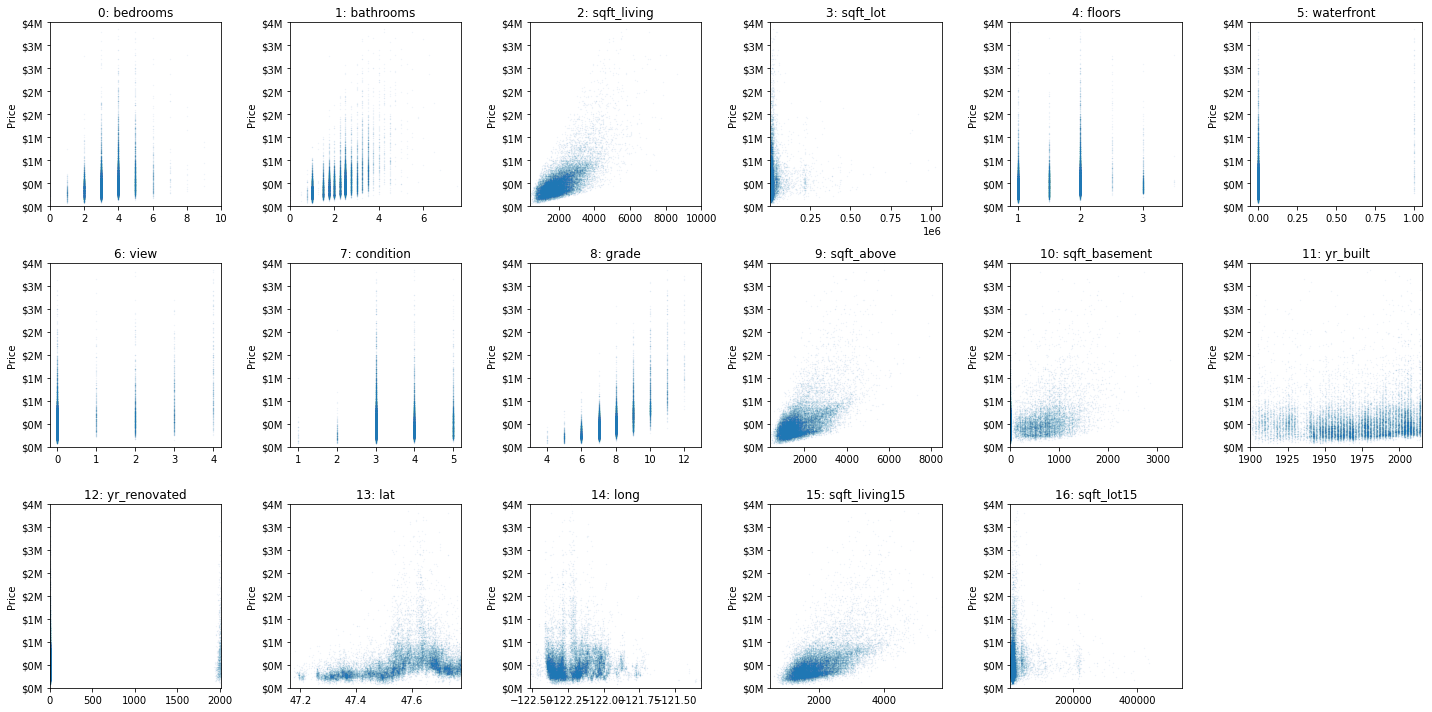

In [0]:
# FuncFormatter can be used as a decorator
import matplotlib.ticker as ticker

@ticker.FuncFormatter
def million_formatter(x, pos):
    return f"${int(x / 10 ** 6)}M"


fig, axes = plt.subplots(3, 6, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    X_col = X.iloc[:, i]
    ax.yaxis.set_major_formatter(million_formatter)
    # set ticks to disregard outliers
    ax.set_ylim(0, 4000000)
    if X_col.nunique() > 10:
        ax.set_xlim(X_col.quantile(q=.0001), X_col.quantile(q=.9999))
    ax.scatter(X_col, y, alpha=.1, s=.1)
    ax.set_title("{}: {}".format(i, X.columns[i]))
    ax.set_ylabel("Price")
plt.tight_layout()

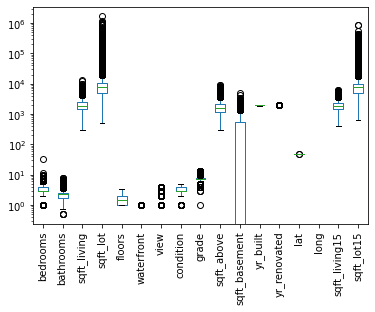

In [0]:
X.plot(kind='box', rot=90, logy=True)
#plt.savefig("images/house_price_boxplot.png")

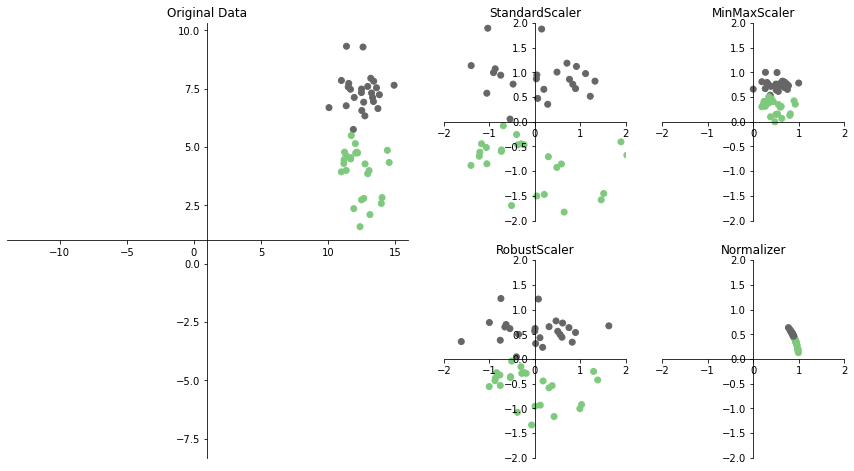

In [0]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3 

plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")
other_axes = [plt.subplot2grid((2, 4), (i, j))
              for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                   MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


In [0]:
X_train.shape

(16209, 17)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.6940091830176798, 0.027329632250816825)

In [0]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.6939895312756573, 0.027401937047030166)

In [0]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.49989224912480734, 0.038759527302481875)

In [0]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7861532506447338, 0.02939940165041626)

In [0]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):
    # multiclass                                                                  
    if eps is None:                                                               
        eps = X.std(axis=0) / 2.
    else:
        eps = np.array([eps, eps])

    if ax is None:                                                                
        ax = plt.gca()                                                            

    x_min, x_max = X[:, 0].min() - eps[0], X[:, 0].max() + eps[0]
    y_min, y_max = X[:, 1].min() - eps[1], X[:, 1].max() + eps[1]
    # these should be 1000 but knn predict is unnecessarily slow
    xx = np.linspace(x_min, x_max, 100)                                          
    yy = np.linspace(y_min, y_max, 100)                                          

    X1, X2 = np.meshgrid(xx, yy)                                                  
    X_grid = np.c_[X1.ravel(), X2.ravel()]                                        
    decision_values = classifier.predict(X_grid)                                  
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,            
                                                       y_min, y_max),             
            aspect='auto', origin='lower', alpha=alpha, cmap=plt.cm.bwr)          

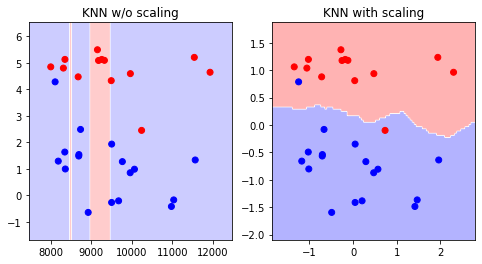

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

X, y = make_blobs(centers=2, random_state=4, n_samples=30)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))


X = X * np.array([1000, 1])

# a carefully hand-designed dataset lol
y[7] = 0
y[27] = 0

knn = KNeighborsClassifier(algorithm='kd_tree').fit(X, y)

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
axes[0].set_title("KNN w/o scaling")
# only adjust plot, don't actually plot alpha=0
plot_2d_classification(knn, X, ax=axes[0], alpha=0)


X_scaled = scale(X)
knn_scaled = KNeighborsClassifier(algorithm='kd_tree').fit(X_scaled, y)

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr')
axes[1].set_title("KNN with scaling")
# only adjust plot, don't actually plot alpha=0
plot_2d_classification(knn_scaled, X_scaled, ax=axes[1], alpha=0)

#plt.savefig("images/knn_scaling.png")

plot_2d_classification(knn, X, ax=axes[0], alpha=.2)
plot_2d_classification(knn_scaled, X_scaled, ax=axes[1], alpha=.3)
#plt.savefig("images/knn_scaling2.png")


# Pipelines

# Not using Pipelines vs feature selection

In [0]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
X_test = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))
y_test = rnd.normal(size=(100,))

In [0]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression,
                          percentile=5)
select.fit(X, y)
X_selected = select.transform(X)
print(X_selected.shape)

(100, 500)


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
np.mean(cross_val_score(Ridge(), X_selected, y))

0.915748217091093

In [0]:
ridge = Ridge().fit(X_selected, y)
X_test_selected = select.transform(X_test)
ridge.score(X_test_selected, y_test)

-0.041340744506775495

# Back to house price?

In [0]:
from sklearn.linear_model import Ridge
X, y = df, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

0.6841700239383453

In [0]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6841700239383453

In [0]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
X_test = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))
y_test = rnd.normal(size=(100,))

In [0]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("select", select),
                 ("ridge", Ridge())])
np.mean(cross_val_score(pipe, X, y))

-0.07959538053827757

In [0]:
from sklearn.linear_model import Ridge
X, y = df, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [0]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((("scaler", StandardScaler()),
                 ("regressor", KNeighborsRegressor)))

In [0]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 8}
0.7784403043016773


In [0]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [0]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid,
                    n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                      

In [0]:
from sklearn.linear_model import Lasso

pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())])

param_grid = {'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'regressor': [Ridge(), Lasso()],
              'regressor__alpha': np.logspace(-3, 3, 7)}


grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.35500225702888577

In [0]:

from sklearn.tree import DecisionTreeRegressor
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())])

param_grid = [{'regressor': [DecisionTreeRegressor()],
               'regressor__max_depth': [2, 3, 4],
               'scaler': ['passthrough']},
              {'regressor': [Ridge()],
               'regressor__alpha': [0.1, 1],
               'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']}
             ]
grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.36901969445308336

# Categorical Variables

In [0]:
import re
def df2html(df):
    shorter = df._repr_html_().replace("th>\n", "th>")
    shorter = shorter.replace("<tr>\n", "<tr>")

    shorter = shorter.replace("td>\n", "td>")
    shorter = re.sub(">[ \t]+<", "><", shorter)
    print(shorter)

In [0]:
import pandas as pd
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


In [0]:
df2html(df)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>salary</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>Manhattan</td><td>103</td><td>No</td></tr>
    <tr><th>1</th><td>Queens</td><td>89</td><td>No</td></tr>
    <tr><th>2</th><td>Manhattan</td><td>142</td><td>No</td></tr>
    <tr><th>3</th><td>Brooklyn</td><td>54</td><td>Yes</td></tr>
    <tr><th>4</th><td>Brooklyn</td><td>63</td><td>Yes</td></tr>
    <tr><th>5</th><td>Bronx</td><td>219</td><td>No</td></tr>
  </tbody>
</table>
</div>


In [0]:
df['boro_ordinal'] = df.boro.astype("category").cat.codes
# reorder columns so it looks nice
df = df[['boro', 'boro_ordinal', 'vegan']]
df

,boro,boro_ordinal,vegan
0,Manhattan,2,No
1,Queens,3,No
2,Manhattan,2,No
3,Brooklyn,1,Yes
4,Brooklyn,1,Yes
5,Bronx,0,No


In [0]:
df2html(df)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>boro_ordinal</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>Manhattan</td><td>2</td><td>No</td></tr>
    <tr><th>1</th><td>Queens</td><td>3</td><td>No</td></tr>
    <tr><th>2</th><td>Manhattan</td><td>2</td><td>No</td></tr>
    <tr><th>3</th><td>Brooklyn</td><td>1</td><td>Yes</td></tr>
    <tr><th>4</th><td>Brooklyn</td><td>1</td><td>Yes</td></tr>
    <tr><th>5</th><td>Bronx</td><td>0</td><td>No</td></tr>
  </tbody>
</table>
</div>


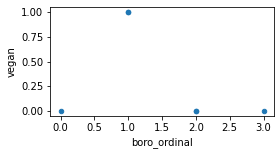

In [0]:
df_int = df.copy()
df_int['vegan'] = df.vegan.astype("category").cat.codes
plt.figure(figsize=(4, 2))
df_int.plot(x='boro_ordinal', y='vegan', kind='scatter', ax=plt.gca())
#plt.savefig("images/boro_ordinal.png")

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(df[['boro_ordinal']], df.vegan)
lr.coef_

array([[-0.45784715]])

In [0]:
lr.intercept_

array([-0.03782071])

In [0]:
dec = lr.decision_function(np.linspace(0, 3).reshape(-1, 1))

In [0]:
lr.predict(np.linspace(0, 3).reshape(-1, 1))

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

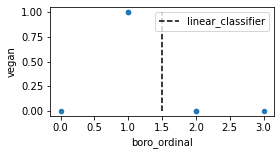

In [0]:
plt.figure(figsize=(4, 2))
df_int.plot(x='boro_ordinal', y='vegan', kind='scatter', ax=plt.gca())
plt.vlines([1.5], 0, 1, linestyle='--', label='linear_classifier')
plt.legend(loc='best')
#plt.savefig("images/boro_ordinal_classification.png")

In [0]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


In [0]:
df2html(df)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>salary</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>Manhattan</td><td>103</td><td>No</td></tr>
    <tr><th>1</th><td>Queens</td><td>89</td><td>No</td></tr>
    <tr><th>2</th><td>Manhattan</td><td>142</td><td>No</td></tr>
    <tr><th>3</th><td>Brooklyn</td><td>54</td><td>Yes</td></tr>
    <tr><th>4</th><td>Brooklyn</td><td>63</td><td>Yes</td></tr>
    <tr><th>5</th><td>Bronx</td><td>219</td><td>No</td></tr>
  </tbody>
</table>
</div>


In [0]:
df2html(pd.get_dummies(df))

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>boro_Bronx</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th><th>vegan_No</th><th>vegan_Yes</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>0</td><td>0</td><td>0</td><td>1</td><td>1</td><td>0</td></tr>
    <tr><th>2</th><td>142</td><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>4</th><td>63</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>5</th><td>219</td

In [0]:
import re
def df2html(df):
    shorter = df.to_html().replace("th>\n", "th>")
    shorter = shorter.replace("<tr>\n", "<tr>")

    shorter = shorter.replace("td>\n", "td>")
    shorter = re.sub(">[ \t]+<", "><", shorter)
    print(shorter)

In [0]:
df2html(pd.get_dummies(df))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>boro_Bronx</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th><th>vegan_No</th><th>vegan_Yes</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>0</td><td>0</td><td>0</td><td>1</td><td>1</td><td>0</td></tr>
    <tr><th>2</th><td>142</td><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>4</th><td>63</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>5</th><td>219</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
  </tbody>
</table>


In [0]:
pd.get_dummies(df, columns=['boro'])

,salary,vegan,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,No,0,0,1,0
1,89,No,0,0,0,1
2,142,No,0,0,1,0
3,54,Yes,0,1,0,0
4,63,Yes,0,1,0,0
5,219,No,1,0,0,0


In [0]:
df2html(pd.get_dummies(df, columns=['boro']))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>vegan</th><th>boro_Bronx</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>2</th><td>142</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>4</th><td>63</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>219</td><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
  </tbody>
</table>


In [0]:
df_ordinal = df.copy()
df_ordinal['boro'] = df.boro.astype("category").cat.codes
df_ordinal

,boro,salary,vegan
0,2,103,No
1,3,89,No
2,2,142,No
3,1,54,Yes
4,1,63,Yes
5,0,219,No


In [0]:
df2html(df_ordinal)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>salary</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>2</td><td>103</td><td>No</td></tr>
    <tr><th>1</th><td>3</td><td>89</td><td>No</td></tr>
    <tr><th>2</th><td>2</td><td>142</td><td>No</td></tr>
    <tr><th>3</th><td>1</td><td>54</td><td>Yes</td></tr>
    <tr><th>4</th><td>1</td><td>63</td><td>Yes</td></tr>
    <tr><th>5</th><td>0</td><td>219</td><td>No</td></tr>
  </tbody>
</table>


In [0]:
pd.get_dummies(df_ordinal, columns=['boro'])

,salary,vegan,boro_0,boro_1,boro_2,boro_3
0,103,No,0,0,1,0
1,89,No,0,0,0,1
2,142,No,0,0,1,0
3,54,Yes,0,1,0,0
4,63,Yes,0,1,0,0
5,219,No,1,0,0,0


In [0]:
df2html(pd.get_dummies(df_ordinal, columns=['boro']))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>vegan</th><th>boro_0</th><th>boro_1</th><th>boro_2</th><th>boro_3</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>2</th><td>142</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>4</th><td>63</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>219</td><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
  </tbody>
</table>


In [0]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df_dummies = pd.get_dummies(df, columns=['boro'])
display(df_dummies)
df2html(df_dummies)

,salary,vegan,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,No,0,0,1,0
1,89,No,0,0,0,1
2,142,No,0,0,1,0
3,54,Yes,0,1,0,0
4,63,Yes,0,1,0,0
5,219,No,1,0,0,0


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>vegan</th><th>boro_Bronx</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>2</th><td>142</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>4</th><td>63</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>219</td><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
  </tbody>
</table>


In [0]:
df = pd.DataFrame({'boro': ['Brooklyn', 'Manhattan', 'Brooklyn', 'Queens', 'Brooklyn', 'Staten Island'],
                   'salary': [61, 146, 142, 212, 98, 47],
                   'vegan': ['Yes', 'No','Yes','No', 'Yes', 'No']})
df_dummies = pd.get_dummies(df, columns=['boro'])
display(df_dummies)
df2html(df_dummies)

,salary,vegan,boro_Brooklyn,boro_Manhattan,boro_Queens,boro_Staten Island
0,61,Yes,1,0,0,0
1,146,No,0,1,0,0
2,142,Yes,1,0,0,0
3,212,No,0,0,1,0
4,98,Yes,1,0,0,0
5,47,No,0,0,0,1


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>vegan</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th><th>boro_Staten Island</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>61</td><td>Yes</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>1</th><td>146</td><td>No</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>2</th><td>142</td><td>Yes</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>3</th><td>212</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>4</th><td>98</td><td>Yes</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>47</td><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
  </tbody>
</table>


In [0]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df['boro'] = pd.Categorical(
    df.boro, categories=['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'])
df_dummies = pd.get_dummies(df, columns=['boro'])
display(df_dummies)
df2html(df_dummies)

,salary,vegan,boro_Manhattan,boro_Queens,boro_Brooklyn,boro_Bronx,boro_Staten Island
0,103,No,1,0,0,0,0
1,89,No,0,1,0,0,0
2,142,No,1,0,0,0,0
3,54,Yes,0,0,1,0,0
4,63,Yes,0,0,1,0,0
5,219,No,0,0,0,1,0


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>vegan</th><th>boro_Manhattan</th><th>boro_Queens</th><th>boro_Brooklyn</th><th>boro_Bronx</th><th>boro_Staten Island</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>No</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>2</th><td>142</td><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>Yes</td><td>0</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>4</th><td>63</td><td>Yes</td><td>0</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>219</td><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
  </tbody>
</table>


In [0]:
from sklearn.preprocessing import OneHotEncoder
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx']})
ce = OneHotEncoder().fit(df)
ce.transform(df).toarray()

array([[0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])

In [0]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
# The Future!

categorical = df.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, LogisticRegression())

# Feature Engineering

interesting random states

18 0.486666666667 0.986666666667
42 0.553333333333 0.986666666667
44 0.526666666667 1.0
54 0.56 1.0
67 0.506666666667 1.0
70 0.586666666667 1.0
79 0.673333333333 1.0
96 0.526666666667 1.0
161 0.486666666667 1.0
174 0.566666666667 1.0
175 0.62 1.0

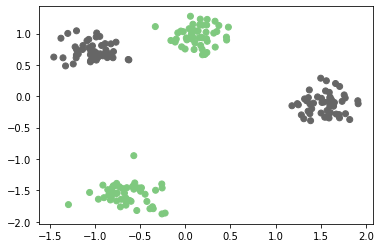

In [0]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
X, y = make_blobs(n_samples=200, centers=4, random_state=42)
X = scale(X)
y = y % 2
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')

In [0]:
from sklearn.linear_model import LogisticRegressionCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegressionCV().fit(X_train, y_train)
logreg.score(X_test, y_test)

0.5

(-2.0, 1.8)

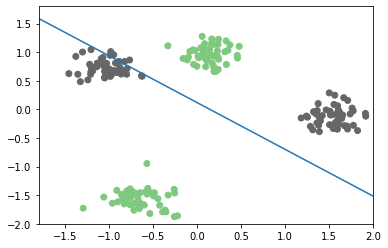

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')
line = np.linspace(-3, 3, 100)
coef = logreg.coef_.ravel()

plt.plot(line, -(coef[0] * line + logreg.intercept_) / coef[1])

plt.xlim(-1.8, 2)
plt.ylim(-2, 1.8)

In [0]:
# Same as PolynomialFeatures(order=2, interactions_only=True)
X_interaction = np.hstack([X, X[:, 0:1] * X[:, 1:]])

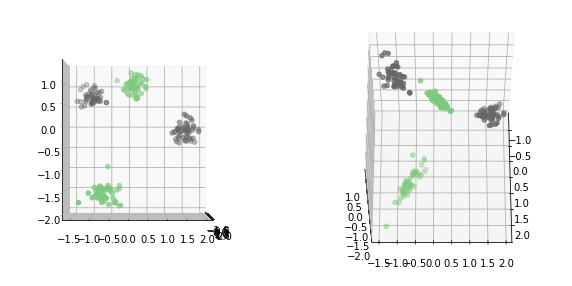

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_interaction[:, 2], X_interaction[:, 0], X_interaction[:, 1], c=y, cmap="Accent")
ax.view_init(elev=0., azim=0)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_interaction[:, 2], X_interaction[:, 0], X_interaction[:, 1], c=y, cmap="Accent")
ax.view_init(elev=60., azim=0)

In [0]:
X_i_train, X_i_test, y_train, y_test = train_test_split(X_interaction, y, random_state=0)
logreg3 = LogisticRegressionCV().fit(X_i_train, y_train)
logreg3.score(X_i_test, y_test)

0.96

(-2.0, 1.8)

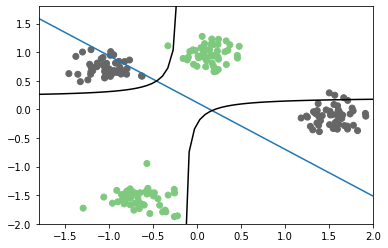

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')
line = np.linspace(-3, 3, 100)
coef = logreg.coef_.ravel()
coef3 = logreg3.coef_.ravel()
plt.plot(line, -(coef[0] * line + logreg.intercept_) / coef[1])
curve = -(coef3[0] * line + logreg3.intercept_) / (coef3[1] + line * coef3[2])
mask = coef3[1] + line * coef3[2] > 0
plt.plot(line[mask], curve[mask], c='k')
plt.plot(line[~mask], curve[~mask], c='k')
plt.xlim(-1.8, 2)
plt.ylim(-2, 1.8)

# Discrete interactions

In [0]:
df = pd.DataFrame({'gender': ['M', 'F', 'M', 'F', 'F'],
                   'age': [14, 16, 12, 25, 22],
                   'spend$': [70, 12, 42, 64, 93],
                   'articles_bought': [5, 10, 2, 1, 1],
                   'time_online': [269, 1522, 235, 63, 21]
                  })
df

,gender,age,spend$,articles_bought,time_online
0,M,14,70,5,269
1,F,16,12,10,1522
2,M,12,42,2,235
3,F,25,64,1,63
4,F,22,93,1,21


In [0]:
dummies = pd.get_dummies(df)
dummies

,age,spend$,articles_bought,time_online,gender_F,gender_M
0,14,70,5,269,0,1
1,16,12,10,1522,1,0
2,12,42,2,235,0,1
3,25,64,1,63,1,0
4,22,93,1,21,1,0


In [0]:
[x + "_F" for x in dummies.columns]

['age_F',
 'spend$_F',
 'articles_bought_F',
 'time_online_F',
 'gender_F_F',
 'gender_M_F']

In [0]:
df_f = dummies.multiply(dummies.gender_F, axis='rows')
df_f = df_f.rename(columns=lambda x: x + "_F")

df_m = dummies.multiply(dummies.gender_M, axis='rows')
df_m = df_m.rename(columns=lambda x: x + "_M")

In [0]:
res = pd.concat([df_m, df_f], axis=1).drop(["gender_F_M", "gender_M_F"], axis=1)
res

,age_M,spend$_M,articles_bought_M,time_online_M,gender_M_M,age_F,spend$_F,articles_bought_F,time_online_F,gender_F_F
0,14,70,5,269,1,0,0,0,0,0
1,0,0,0,0,0,16,12,10,1522,1
2,12,42,2,235,1,0,0,0,0,0
3,0,0,0,0,0,25,64,1,63,1
4,0,0,0,0,0,22,93,1,21,1


# Polynomial Features

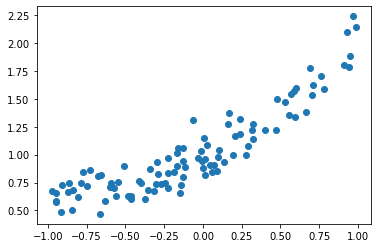

In [0]:
rng = np.random.RandomState(2)
x = rng.uniform(-1, 1, size=(100,))
X = x.reshape(-1, 1)
x_noisy = x + rng.normal(scale=0.1, size=x.shape)
coef = rng.normal(size=3)
y = coef[0] * x_noisy ** 2 + coef[1] * x_noisy + coef[2] + rng.normal(scale=0.1, size=x.shape)
plt.plot(x, y, 'o')

0.7633239152617028

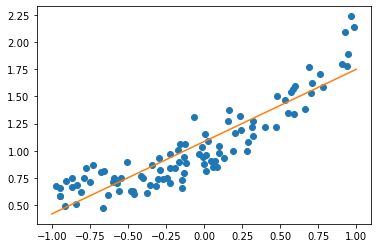

In [0]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
line = np.linspace(-1, 1, 100).reshape(-1, 1)
plt.plot(x, y, 'o')
plt.plot(line, lr.predict(line))
lr.score(X_test, y_test)

0.8336786269754219

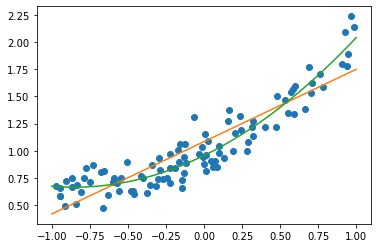

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_lr = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())

poly_lr.fit(X_train, y_train)

plt.plot(x, y, 'o')
plt.plot(line, lr.predict(line))
plt.plot(line, poly_lr.predict(line))
poly_lr.score(X_test, y_test)

# target featurizer

In [0]:
data.frame.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
data.frame.zipcode.value_counts()

98103.0    602
98038.0    590
98115.0    583
98052.0    574
98117.0    553
          ... 
98102.0    105
98010.0    100
98024.0     81
98148.0     57
98039.0     50
Name: zipcode, Length: 70, dtype: int64

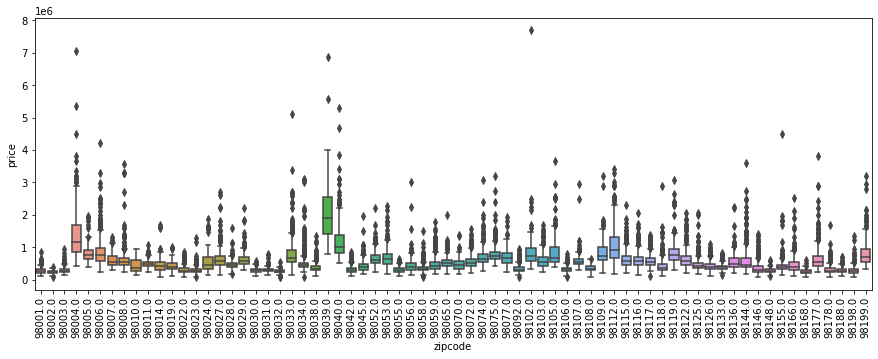

In [0]:
import seaborn as sns
plt.figure(figsize=(15, 5))
ax = sns.boxplot(data.frame.zipcode, data.frame.price)
#plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
#plt.savefig("images/zip_code_prices.png")

In [0]:
data = fetch_openml("house_sales", as_frame=True)
X = data.frame.drop(['date', 'price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, target)
X_train.columns

/usr/local/lib/python3.6/dist-packages/sklearn/datasets/_openml.py:372: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
# drop some stuff so it fits on slide
import pandas as pd
pd.set_option('display.max_columns', 10)
#disp = X_train.drop(['waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_renovated'], axis=1).head()
disp = X_train.head()
disp

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,zipcode,lat,long,sqft_living15,sqft_lot15
13827,4.0,2.50,2350.0,10655.0,2.0,...,98092.0,47.3284,-122.171,2210.0,7028.0
7175,3.0,1.50,1980.0,10203.0,1.0,...,98010.0,47.3402,-122.046,1980.0,13664.0
4098,3.0,3.25,2990.0,189852.0,2.0,...,98072.0,47.7460,-122.138,3500.0,48760.0
16255,3.0,1.75,1840.0,7300.0,1.0,...,98023.0,47.3122,-122.369,1920.0,8010.0
11707,4.0,1.75,1640.0,10500.0,1.0,...,98052.0,47.6933,-122.116,1680.0,7650.0


In [0]:
disp._repr_html_()

'<div>\n<style scoped>\n    .dataframe tbody tr th:only-of-type {\n        vertical-align: middle;\n    }\n\n    .dataframe tbody tr th {\n        vertical-align: top;\n    }\n\n    .dataframe thead th {\n        text-align: right;\n    }\n</style>\n<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>bedrooms</th>\n      <th>bathrooms</th>\n      <th>sqft_living</th>\n      <th>sqft_lot</th>\n      <th>floors</th>\n      <th>...</th>\n      <th>zipcode</th>\n      <th>lat</th>\n      <th>long</th>\n      <th>sqft_living15</th>\n      <th>sqft_lot15</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>13827</th>\n      <td>4.0</td>\n      <td>2.50</td>\n      <td>2350.0</td>\n      <td>10655.0</td>\n      <td>2.0</td>\n      <td>...</td>\n      <td>98092.0</td>\n      <td>47.3284</td>\n      <td>-122.171</td>\n      <td>2210.0</td>\n      <td>7028.0</td>\n    </tr>\n    <tr>\n      <th>7175</th>\n      <td>3.0</td>\n   

In [0]:
df2html(disp)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>bedrooms</th><th>bathrooms</th><th>sqft_living</th><th>sqft_lot</th><th>floors</th><th>waterfront</th><th>view</th><th>condition</th><th>grade</th><th>sqft_above</th><th>sqft_basement</th><th>yr_built</th><th>yr_renovated</th><th>zipcode</th><th>lat</th><th>long</th><th>sqft_living15</th><th>sqft_lot15</th></tr>
  </thead>
  <tbody>
    <tr><th>13827</th><td>4.0</td><td>2.50</td><td>2350.0</td><td>10655.0</td><td>2.0</td><td>0.0</td><td>0.0</td><td>3.0</td><td>8.0</td><td>2350.0</td><td>0.0</td><td>1992.0</td><td>0.0</td><td>98092.0</td><td>47.3284</td><td>-122.171</td><td>2210.0</td><td>7028.0</td></tr>
    <tr><th>7175</th><td>3.0</td><td>1.50</td><td>1980.0</td><td>10203.0</td><td>1.0</td><td>0.0</td><td>0.0</td><td>4.0</td><td>7.0</td><td>1680.0</td><td>300.0</td><td>1946.0</td><td>0.0</td><td>98010.0</td><td>47.3402</td><td>-122.046</td><td>1980.0</td><td>13664.0</td></tr>
    <tr

In [0]:
!pip install category_encoders

     |████████████████████████████████| 81kB 2.2MB/s 


In [0]:
from category_encoders import TargetEncoder
te = TargetEncoder(cols='zipcode').fit(X_train, y_train)
te.transform(X_train).head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,zipcode,lat,long,sqft_living15,sqft_lot15
13827,4.0,2.50,2350.0,10655.0,2.0,...,332058.081395,47.3284,-122.171,2210.0,7028.0
7175,3.0,1.50,1980.0,10203.0,1.0,...,418884.527027,47.3402,-122.046,1980.0,13664.0
4098,3.0,3.25,2990.0,189852.0,2.0,...,575468.700483,47.7460,-122.138,3500.0,48760.0
16255,3.0,1.75,1840.0,7300.0,1.0,...,286154.263014,47.3122,-122.369,1920.0,8010.0
11707,4.0,1.75,1640.0,10500.0,1.0,...,648790.962529,47.6933,-122.116,1680.0,7650.0


In [0]:
disp2 = te.transform(X_train).head()
df2html(disp2)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>bedrooms</th><th>bathrooms</th><th>sqft_living</th><th>sqft_lot</th><th>floors</th><th>waterfront</th><th>view</th><th>condition</th><th>grade</th><th>sqft_above</th><th>sqft_basement</th><th>yr_built</th><th>yr_renovated</th><th>zipcode</th><th>lat</th><th>long</th><th>sqft_living15</th><th>sqft_lot15</th></tr>
  </thead>
  <tbody>
    <tr><th>13827</th><td>4.0</td><td>2.50</td><td>2350.0</td><td>10655.0</td><td>2.0</td><td>0.0</td><td>0.0</td><td>3.0</td><td>8.0</td><td>2350.0</td><td>0.0</td><td>1992.0</td><td>0.0</td><td>332058.081395</td><td>47.3284</td><td>-122.171</td><td>2210.0</td><td>7028.0</td></tr>
    <tr><th>7175</th><td>3.0</td><td>1.50</td><td>1980.0</td><td>10203.0</td><td>1.0</td><td>0.0</td><td>0.0</td><td>4.0</td><td>7.0</td><td>1680.0</td><td>300.0</td><td>1946.0</td><td>0.0</td><td>418884.527027</td><td>47.3402</td><td>-122.046</td><td>1980.0</td><td>13664.0</td><

In [0]:
pd.DataFrame(y.groupby(X.zipcode).mean()[X_train.head().zipcode]).T

AttributeError: ignored

In [0]:
df2html(pd.DataFrame(y_train.groupby(X_train.zipcode).mean()[X_train.head().zipcode]).T)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>zipcode</th><th>98092.0</th><th>98010.0</th><th>98072.0</th><th>98023.0</th><th>98052.0</th></tr>
  </thead>
  <tbody>
    <tr><th>price</th><td>332058.081395</td><td>418884.527027</td><td>575468.700483</td><td>286154.263014</td><td>648790.962529</td></tr>
  </tbody>
</table>


In [0]:
from category_encoders import LeaveOneOutEncoder, TargetEncoder

In [0]:

X = data.frame.drop(['date', 'price'], axis=1)
pipe_target = make_pipeline(TargetEncoder(cols='zipcode'), Ridge())
scores = cross_val_score(pipe_target, X, target)
np.mean(scores)

0.7862175426353509

In [0]:
X = data.frame.drop(['date', 'price', 'zipcode'], axis=1)
scores = cross_val_score(Ridge(), X, target)
np.mean(scores)

0.6902748870651887

In [0]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
X = data.frame.drop(['date', 'price'], axis=1)

pipe_ohe = make_pipeline(make_column_transformer((OneHotEncoder(), ['zipcode']), remainder='passthrough'), Ridge())
scores = cross_val_score(pipe_ohe, X, target)
np.mean(scores)

0.5338344704237407

In [0]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
TargetEncoder(cols='zipcode').fit_transform(data.frame, y)

ValueError: ignored

# Feature Distributions

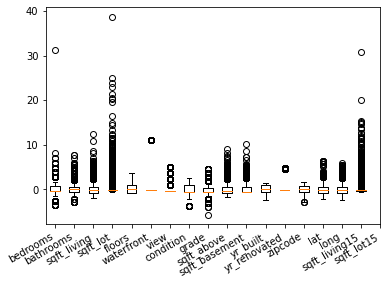

In [0]:
plt.boxplot(X_train_scaled)
plt.xticks(np.arange(1, X.shape[1] + 1), X.columns, rotation=30, ha="right");
#plt.savefig("images/house_price_scaled_box.png")

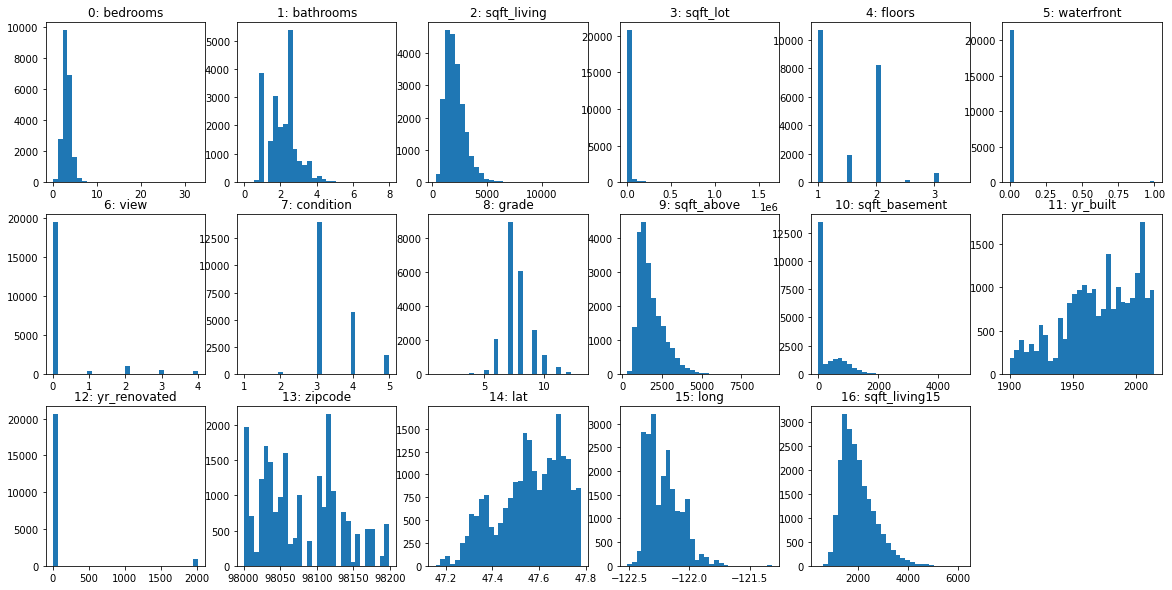

In [0]:
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    ax.hist(X.iloc[:, i], bins=30)
    ax.set_title("{}: {}".format(i, X.columns[i]))
#plt.savefig("images/house_price_hist.png")

In [0]:
def bc(x, l):
    if l == 0:
        return np.log(x)
    else:
        return (x ** l - 1) / l


In [0]:
line = np.arange(1e-10, 10, 100)

In [0]:
line

array([1.e-10])

(0.0, 10.0)

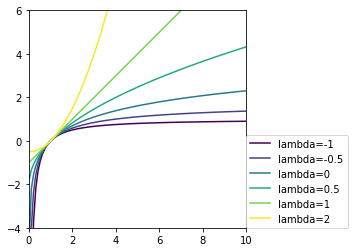

In [0]:
line = np.linspace(.01, 10, 100)
colors =  [plt.cm.viridis(i) for i in np.linspace(0, 1, 6)]
for l, c in zip([-1, -.5, 0, .5, 1, 2], colors):
    plt.plot(line, bc(line, l), label="lambda={}".format(l), color=c)
plt.ylim(-4, 6)
plt.gca().set_aspect("equal")
plt.legend(loc=(1, 0))
plt.xlim(0, 10)

In [0]:
from sklearn.preprocessing import MinMaxScaler
# this is very hacky and you probably shouldn't do this in real life.
X_train_mm = MinMaxScaler().fit_transform(X_train) + 1e-5

[  -4.26145834   -0.90798852   -5.69409062 -105.39793791   -1.83564027
 -201.59320899  -21.98404169   -1.93756087   -2.07892458   -5.86070775
  -12.23954358    2.27194962  -35.35492425   -0.40905216    2.62772107
   -3.02654569   -3.38782249  -68.62552848]


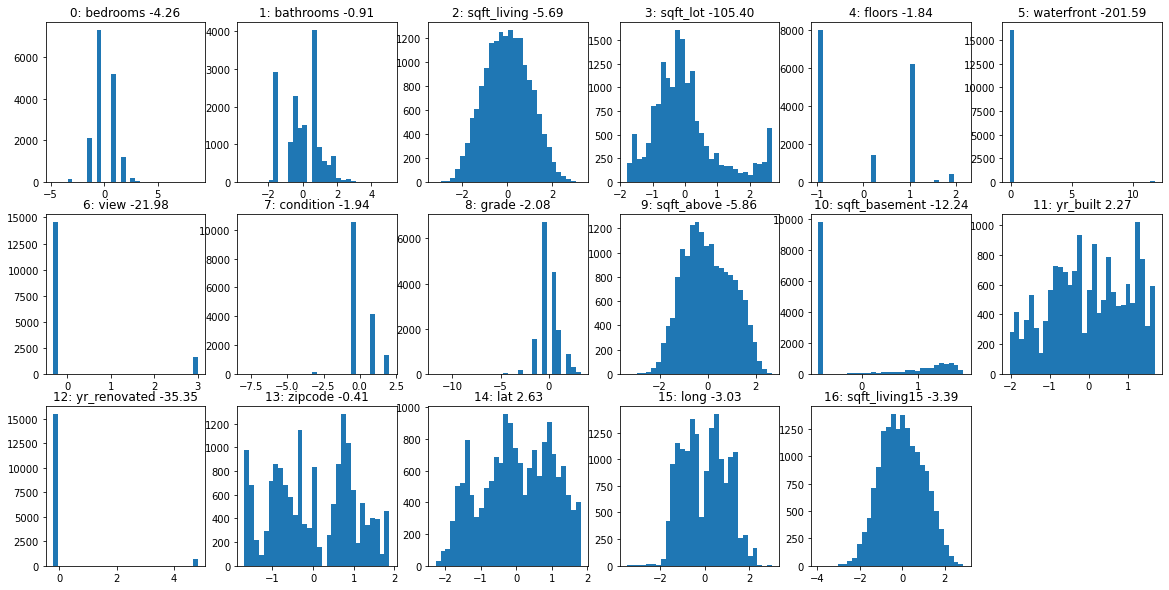

In [0]:
from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
pt = PowerTransformer()
X_bc = pt.fit_transform(X_train_mm)
print(pt.lambdas_)

for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    ax.hist(X_bc[:, i], bins=30)
    ax.set_title("{}: {} {:.2f}".format(i, X.columns[i], pt.lambdas_[i]))
#plt.savefig("images/house_price_hist_boxcox.png")

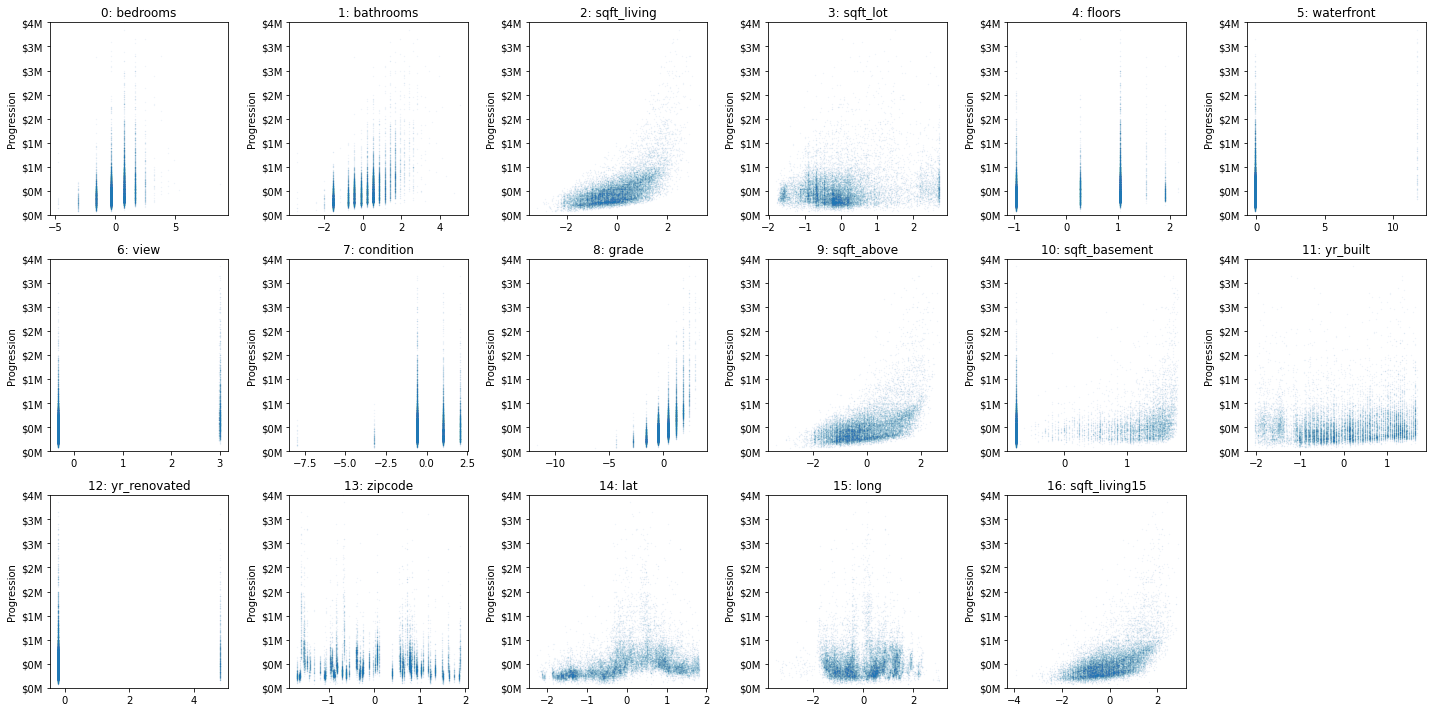

In [0]:
X_bc_scaled = StandardScaler().fit_transform(X_bc)
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    ax.yaxis.set_major_formatter(million_formatter)
    ax.set_ylim(0, 4000000)
    ax.scatter(X_bc_scaled[:, i], y_train, s=.1, alpha=.1)
    ax.set_title("{}: {}".format(i, X.columns[i]))
    ax.set_ylabel("Progression")
plt.tight_layout()
#plt.savefig("images/house_price_bc_scaled_scatter.png")

In [0]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.699921854182838, 0.02229382893184192)

In [0]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
print(np.mean(scores), np.std(scores))


-0.0018514731236016879 0.001989879398324666


In [0]:
scores = cross_val_score(RidgeCV(), X_bc_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.6152890020436101, 0.028322688240881036)

In [0]:
ridge = RidgeCV().fit(X_train_scaled, y_train)
ridge_bc = RidgeCV().fit(X_bc_scaled, y_train)

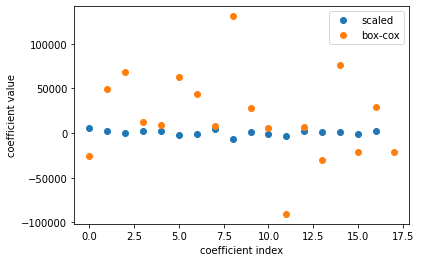

In [0]:
plt.plot(ridge.coef_, 'o', label="scaled")
plt.plot(ridge_bc.coef_, 'o', label="box-cox")
plt.xlabel("coefficient index")
plt.ylabel("coefficient value")
plt.legend()

In [0]:
from sklearn.datasets import fetch_openml
data = fetch_openml("house_sales", as_frame=True)

/usr/local/lib/python3.6/dist-packages/sklearn/datasets/_openml.py:372: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


In [0]:
data.frame.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
data.frame.date

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [0]:
import dabl
dabl.plot(data.frame, target_col='price')

ModuleNotFoundError: ignored